# Sarcasm Detection with Bidirectional LSTM

### Import Necessary Libraries

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.layers import GRU,Dense

### Read 'Data.csv'

In [136]:
df = pd.read_csv('Data.csv')

In [137]:
df.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",Sarcastic
2,New Emails Reveal Warm Relationship Between Ka...,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic


### Print some of the Headlines along with the target

In [138]:
for i in range(10):
    print(df['headlines'][i], ' - ',df['target'][i] )
    print()

CNN Triumphs (At Least in Most Demographic Categories)  -  Non Sarcastic

‘You Did The Best You Could,’ Says Iron Man Action Figure Voiced By Despondent Toys ‘R’ Us CEO Packing Up Office  -  Sarcastic

New Emails Reveal Warm Relationship Between Kamala Harris And Big Tech  -  Non Sarcastic

Donald Trump Jr. Gets Slammed Over Racist Birtherism Bot Attack On Kamala Harris  -  Non Sarcastic

God Urges Rick Perry Not To Run For President  -  Sarcastic

Global Aid Pours into Haiti  -  Non Sarcastic

CNN Anchor Calls Obama Protester 'Rude' And 'Crazy'  -  Non Sarcastic

Federal Prisons Reinstitute Executions By Lethal Inflation  -  Sarcastic

Lou Dobbs Crumbles When Pressed On His 'NAFTA Super Highway' Myth  -  Non Sarcastic

CNN Still Bent On Debating 'Two Sides' Of The Confederacy  -  Non Sarcastic



### Check Info

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  12506 non-null  object
 1   target     12506 non-null  object
dtypes: object(2)
memory usage: 195.5+ KB


### View basic statistical information about the dataset

In [140]:
df.describe()

,headlines,target
count,12506,12506
unique,12506,2
top,Conjoined Twin Hogging Kidney,Non Sarcastic
freq,1,6531


### Check for missing values

In [141]:
df.isna().sum()

headlines    0
target       0
dtype: int64

### Check for duplicates

In [142]:
df.duplicated().sum()

np.int64(0)

### Plot a countplot of the Class Index

C:\Users\muham\AppData\Local\Temp\ipykernel_18756\2752858854.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['target'],palette='plasma')


<Axes: xlabel='count', ylabel='target'>

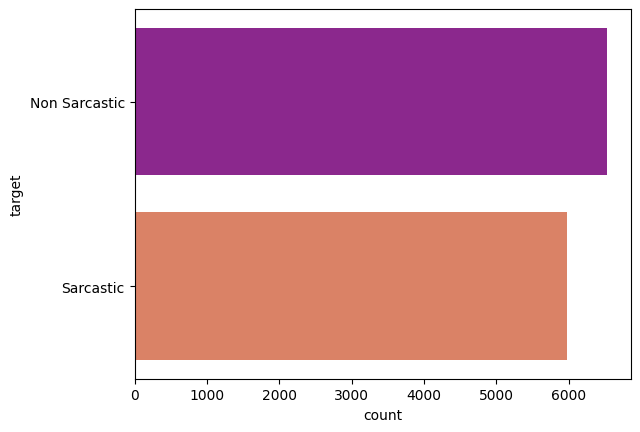

In [143]:
sns.countplot(y=df['target'],palette='plasma')

### Create a funciton to preprocess the text

In [144]:
def preprocess(sentence):
    sentence = sentence.lower()
    word = re.sub(r'[^A-Za-z0-9]',' ',sentence).split()
    lem = WordNetLemmatizer()
    word = [lem.lemmatize(i)for i in word]
    return ' '.join(word)

### Apply the preprocess function to the description

In [145]:
df['headlines']  = df['headlines'].apply(preprocess)

In [146]:
for i in range(10):
    print(df['headlines'][i],' - ',df['headlines'][i])
    print()

cnn triumph at least in most demographic category  -  cnn triumph at least in most demographic category

you did the best you could say iron man action figure voiced by despondent toy r u ceo packing up office  -  you did the best you could say iron man action figure voiced by despondent toy r u ceo packing up office

new email reveal warm relationship between kamala harris and big tech  -  new email reveal warm relationship between kamala harris and big tech

donald trump jr get slammed over racist birtherism bot attack on kamala harris  -  donald trump jr get slammed over racist birtherism bot attack on kamala harris

god urge rick perry not to run for president  -  god urge rick perry not to run for president

global aid pours into haiti  -  global aid pours into haiti

cnn anchor call obama protester rude and crazy  -  cnn anchor call obama protester rude and crazy

federal prison reinstitute execution by lethal inflation  -  federal prison reinstitute execution by lethal inflation

### Split Input & Target Variables

In [147]:
x=df['headlines']

y=df['target']

In [148]:
y

0        Non Sarcastic
1            Sarcastic
2        Non Sarcastic
3        Non Sarcastic
4            Sarcastic
             ...      
12501    Non Sarcastic
12502        Sarcastic
12503        Sarcastic
12504    Non Sarcastic
12505        Sarcastic
Name: target, Length: 12506, dtype: object

### One Hot encode our Target Variable

In [149]:
df['target'].value_counts()

target
Non Sarcastic    6531
Sarcastic        5975
Name: count, dtype: int64

In [150]:
y = y.map({'Non Sarcastic':0,'Sarcastic':1})

In [151]:
y

0        0
1        1
2        0
3        0
4        1
        ..
12501    0
12502    1
12503    1
12504    0
12505    1
Name: target, Length: 12506, dtype: int64

In [152]:
df['target'].value_counts()

target
Non Sarcastic    6531
Sarcastic        5975
Name: count, dtype: int64

### Split the dataset into Training & Testing Set

In [153]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

### Create a keras Tokenizer object

In the Keras library, the Tokenizer is a class that can be used to preprocess text data. It allows you to convert a collection of text documents into a numerical representation that can be used as input to a machine learning model.

In [154]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(xtrain)
vocab_size = len(tokenizer.word_index) + 1

def text_encoding(txt):
    encoded = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(encoded, maxlen=128)
    return padded
x = text_encoding(xtrain)
xtest = text_encoding(xtest)
    

### fit on text for our X

### Create a function to convert text to numerical representation and add padding

### Apply the function to our X_train & X_test

### Create keras Sequential model with GRU Layers

In [155]:
model = Sequential()
model.add(layers.Embedding(vocab_size,128))
model.add(layers.GRU(128,return_sequences=True))
model.add(layers.Dropout(0.02))
model.add(layers.GRU(128))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.02))
model.add(layers.Dense(1,activation='sigmoid'))

### Compile the model

In [156]:
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'])

In [157]:
x

array([[   0,    0,    0, ...,   67,    9,    7],
       [   0,    0,    0, ...,   38,    3,  516],
       [   0,    0,    0, ...,  149,  131,  342],
       ...,
       [   0,    0,    0, ...,    2, 1053, 3211],
       [   0,    0,    0, ...,  367, 3182, 3177],
       [   0,    0,    0, ...,   12, 3172, 3440]], dtype=int32)

In [125]:
ytrain.shape

(10004,)

### Train the model with our Training Set

In [170]:
model.fit(x,ytrain,epochs=5,validation_split=0.03)

Epoch 1/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 39s 118ms/step - accuracy: 0.7688 - loss: 0.4406 - val_accuracy: 0.9336 - val_loss: 0.1764
Epoch 2/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 35s 114ms/step - accuracy: 0.9509 - loss: 0.1387 - val_accuracy: 0.9336 - val_loss: 0.1701
Epoch 3/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 34s 111ms/step - accuracy: 0.9777 - loss: 0.0684 - val_accuracy: 0.9169 - val_loss: 0.2816
Epoch 4/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.9890 - loss: 0.0323 - val_accuracy: 0.9302 - val_loss: 0.3103
Epoch 5/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 34s 111ms/step - accuracy: 0.9944 - loss: 0.0161 - val_accuracy: 0.9169 - val_loss: 0.3296


### Make predictions with Test set

In [171]:
pred = model.predict(xtest)

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


In [173]:
pred_ = pred.argmax(axis=1)

### Check accuracy score

In [174]:
accuracy_score(ytest,pred_)

0.5243804956035172

### Confusion matrix

<Axes: >

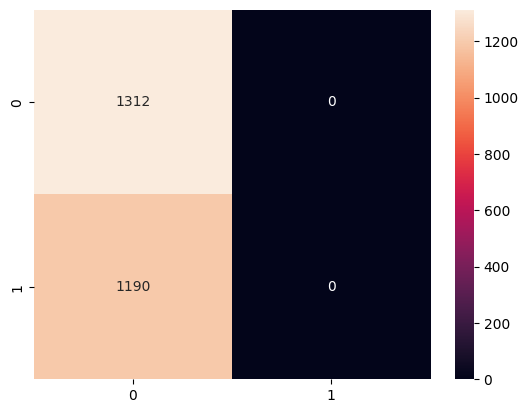

In [175]:
sns.heatmap(confusion_matrix(ytest,pred_),annot=True,fmt='d')

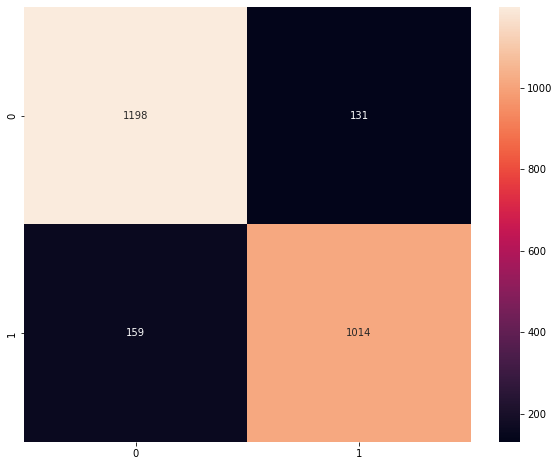

### Classification Report

In [176]:
print(classification_report(ytest,pred_))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69      1312
           1       0.00      0.00      0.00      1190

    accuracy                           0.52      2502
   macro avg       0.26      0.50      0.34      2502
weighted avg       0.27      0.52      0.36      2502



c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1329
           1       0.89      0.86      0.87      1173

    accuracy                           0.88      2502
   macro avg       0.88      0.88      0.88      2502
weighted avg       0.88      0.88      0.88      2502



***